# Introduction to NumPy for Machine Learning

The goal of this session is primarily to demonstrate `NumPy` for fast numerical computing in python.

We use a machine learning context to illustrate how `NumPy` can be used.

# Part 0: NumPy

## What is NumPy?

NumPy is a library for fast numerical computation in python. 

In [2]:
import numpy as np

It is essentially a linear algebra library: mostly concerned with structured sets of numbers and simple operations across those sets. 

## How are sets of numbers structured?

Structure
* computer science = tabular
* mathematical = operations
    * product = multiplication

* sequences, "a row"
    * 1, 2, 3, 4
    * add,  element-wise product, ...
    * eg., a single measurement of several variables
* vectors, "a column"
    * vector product, ... 
    * eg., age, 
* matrices, "a table"
    * matrix product, matrix-vector product
    * eg., a whole dataset (age, height, ...)
* tensors, "a sequence of tables"
    * tensor product, ...
    * eg., image (green matrix, blue matrix, red matrix, ...)

In numpy all these structures are callled "arrays" and they are distinguished by their *shape*, 

For demonstration we will start with a python list,

In [3]:
data = [
    10, 20, 30, 40, 50, 60, 70, 80,
    11, 21, 31, 41, 51, 61, 71, 81,
]

In [4]:
len(data)

16

We can make a numpy array using `np.array`, 

In [5]:
seq = np.array(data)

In [6]:
seq

array([10, 20, 30, 40, 50, 60, 70, 80, 11, 21, 31, 41, 51, 61, 71, 81])

In [7]:
seq.shape

(16,)

A vector is a column, we can reshape into columnar format,

In [115]:
vector = seq.reshape(16, 1) # 16 rows, 1 col

In [9]:
vector

array([[10],
       [20],
       [30],
       [40],
       [50],
       [60],
       [70],
       [80],
       [11],
       [21],
       [31],
       [41],
       [51],
       [61],
       [71],
       [81]])

In [10]:
vector.shape

(16, 1)

A matrix is tabular (rows, cols),

In [11]:
matrix = seq.reshape(4, 4)

In [12]:
matrix

array([[10, 20, 30, 40],
       [50, 60, 70, 80],
       [11, 21, 31, 41],
       [51, 61, 71, 81]])

In [13]:
matrix.shape

(4, 4)

Aside: tensors are sequences of matrices,

In [14]:
tensor = seq.reshape(2, 2, 4)

In [15]:
tensor.shape

(2, 2, 4)

In [120]:
tensor # 2 2x4 matrices

array([[[10, 20, 30, 40],
        [50, 60, 70, 80]],

       [[11, 21, 31, 41],
        [51, 61, 71, 81]]])

## How do you index data in NumPy?

The shape determines the number of indexes a data structure has,

In [16]:
seq[0]

10

In [17]:
vector[0, 0]

10

In [18]:
matrix[0, 1]

20

In [19]:
tensor[0, 0, 0]

10

## What operations are specific to each `shape`?

Python lists are very limited,

In [20]:
data

[10, 20, 30, 40, 50, 60, 70, 80, 11, 21, 31, 41, 51, 61, 71, 81]

In [21]:
# data * data # ERROR: python lists are not "vectorized"

numpy automatically handles repetition of operations ("vectorization"), 

In [22]:
3 * seq

array([ 30,  60,  90, 120, 150, 180, 210, 240,  33,  63,  93, 123, 153,
       183, 213, 243])

In [23]:
seq * seq

array([ 100,  400,  900, 1600, 2500, 3600, 4900, 6400,  121,  441,  961,
       1681, 2601, 3721, 5041, 6561])

With vectors we can use `@` operation which is a *structured product*, a multiplication and summation which is "senitive" to the structure of the data,

In [121]:
vector.T @ vector # multiply and add the entires of vector together

array([[41528]])

In [25]:
vector[0, 0] * vector[0, 0] + vector[1, 0] * vector[1, 0] # + ... 

500

With matrices you can do a matrix-vector product, 

In [26]:
matrix

array([[10, 20, 30, 40],
       [50, 60, 70, 80],
       [11, 21, 31, 41],
       [51, 61, 71, 81]])

In [27]:
matrix @ np.array([1, 2, 3, 4])

array([300, 700, 310, 710])

In [28]:
1 * 10 + 2 * 20 + 3 * 30 + 4 * 40

300

Aside: "sensitive to structure" here means that the multiplication runs across the row of the matrix (vs., eg., down a column). 

## Aside: Images

You can visualize datasets as images,

In [57]:
import matplotlib.pyplot as plt

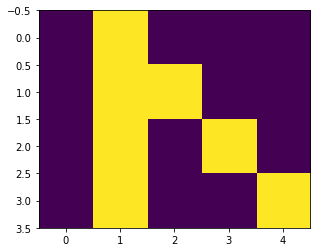

In [58]:
image = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 1],
])

plt.imshow(image)

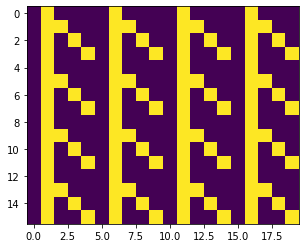

In [61]:
plt.imshow(np.tile(image, (4, 4)))

# Part 1: Machine Learning 

## What is Machine Learning?

* Historical data
    * $(X, \vec{y})$
    * X is a matrix
    * if we are predicting, we must also have,
        * y is a vector
            * often just left as a sequence

* Example
    * X : DaysSincePurchase, ClaimAmount, ...
    * y : Fraud|NotFraud, 

In [29]:
X = np.array([
    (30, 1000),
    (3,  5000),
    (300, 500),
])

## What is Unsupervised Learning?

Analysis of observable information to directly draw/infer conclusions,  or assist in the inferential process. 

### Interlude: Indexing in NumPy

`:` as an index means "all", 

In [30]:
X[ : , 0] # all rows, 0th column

array([ 30,   3, 300])

In [31]:
X[:, 1]

array([1000, 5000,  500])

In [32]:
X[:, 1].mean()

2166.6666666666665

In [33]:
X[:, 1].std()

2013.8409955990955

## What is Supervised Learning?

We have historical examples of what we're trying to predict, 

In [34]:
y = np.array([
    1,
    1, 
    0
])

The goal is to produce, 

$\hat{y} = \hat{f}(X)$

such that, 

$f(X) - \hat{f}(X)$ is nearly zero

However we do not know what the true relationship is, ie., $f$.

So we aim merely to show that our predictions are close to our observations, ie., that

$y - \hat{f}(X)$ is minimal

## What does "close" mean?

In supervised learning we often, in addition, define a function which describes how close $y$ and $\hat{f}(X)$ are, ...

$loss(y, \hat{f}(X))$

The goal then is to *minimize* this distance, ie., 

find, $\hat{y} = \hat{f}(X)$ st. $\text{ min } loss(y, \hat{f}(X))$

## An Example: Classifying Fraud

Recall the fraud dataset `X`, `y` is,

In [35]:
X

array([[  30, 1000],
       [   3, 5000],
       [ 300,  500]])

In [52]:
y

array([1, 1, 0])

Suppose our estimating function, $\hat{f}$, is 

$\text{ 1 if } (X_0 > 30) \text{ & } (X_1 < 1000) \text{ otherwise 0 }$ 

In [44]:
yhat = ((X[:, 0] > 30) & (X[:, 1] < 1000)).astype(int)

Our predictions are,

In [45]:
yhat

array([0, 0, 1])

Our observations are,

In [46]:
y

array([1, 1, 0])

Suppose we choose a total loss, $\sum |y - \hat{y}|$, 

In [47]:
abs(y - yhat).sum()

3

, which here shows all of our predicitons are incorrect.

Let's try another $\hat{f}$,

In [114]:
yhat2 = ((X[:, 0] < 300) | (X[:, 1] > 1000)).astype(int) # the fhat here is the formula ( ... )

In [54]:
X

array([[  30, 1000],
       [   3, 5000],
       [ 300,  500]])

In [55]:
yhat2

array([1, 1, 0])

In [56]:
abs(y - yhat2).sum()

0

, so every prediction here is correct.

## Review: Machine Learning

In machine learning we have a historical dataset which we either
* use for prediction: supervised learning
* use for non-predictive inference: unsupervised learning

In supervised learning we aim to get a function (, relationship) which can compute a prediction target from observable features, which is "accurate". 

A prediction function is accurate if its predictions are "close" to the observed history of our prediction target. 

The meaning of "close" is left to the practioner to define, the general definition is given as a "loss function".

A loss function describes the distance between our predictions and our observations. Eg., the total loss could just be the sum of our predicitons - observations. 

# Part 2: How do I Query Data with NumPy?

In [62]:
X

array([[  30, 1000],
       [   3, 5000],
       [ 300,  500]])

## How do I select individual elements?

In [64]:
X[0, 0] # 0th row, 0th column

30

In [66]:
X[-1, -1] # last row, last column

500

## How do I select multiple elements?

In python we call an index range a *slice*, and it's written

```
START_INDEX : END_INDEX
```

It's placed within an "index context", 

```
variable[  START : END ]
```

In [67]:
seq

array([10, 20, 30, 40, 50, 60, 70, 80, 11, 21, 31, 41, 51, 61, 71, 81])

In [72]:
seq[0:3] # from 0 until 3 -- including indexes 0, 1, 2

array([10, 20, 30])

In [74]:
seq[-5:-1] # from the 5-from-end until the 1-from-end

array([41, 51, 61, 71])

In [76]:
seq[-5:]

array([41, 51, 61, 71, 81])

In [78]:
seq[:5] # from the beginning until index 5

array([10, 20, 30, 40, 50])

In [81]:
seq[:] # all, ie., from the beginning to the end

array([10, 20, 30, 40, 50, 60, 70, 80, 11, 21, 31, 41, 51, 61, 71, 81])

## How do I select columns, rows in a matrix?

In [82]:
X

array([[  30, 1000],
       [   3, 5000],
       [ 300,  500]])

In [83]:
X[:, 0] # all rows, first col

array([ 30,   3, 300])

In [84]:
X[:, 1] # all rows, second col

array([1000, 5000,  500])

In [85]:
X[0, :] # first row, all col

array([  30, 1000])

In [87]:
X[1, :] # second row, all col

array([   3, 5000])

In [89]:
X[    0:2   ,   :   ] # from 0-index until 2-index, all cols; ie., first two, all col

array([[  30, 1000],
       [   3, 5000]])

## How do I filter an array?

To filter a numpy array you use a test in the *row* position.

### How do I use simple conditions to filter?

In [90]:
X

array([[  30, 1000],
       [   3, 5000],
       [ 300,  500]])

In [95]:
rows = [0, 1] 

X[rows, :] # rows 0 and 1, all cols

array([[  30, 1000],
       [   3, 5000]])

In [97]:
X[:, 0] > 10

array([ True, False,  True])

In [100]:
rows = X[:, 0] > 10 # the first col is more than 10
X[rows, :] # all the cols where the first is more than 10

array([[  30, 1000],
       [ 300,  500]])

In [102]:
X[ X[:, 0] > 10, : ] # all the columns of X where the first col is more than 10

array([[  30, 1000],
       [ 300,  500]])

### How do I combine conditions?

Recall that in python the logical operators are `and`, `or`, `not`, 

In [103]:
age = 19
city = "London"

if (age > 18) and ( city == "London"):
    print("ALLOWED")

ALLOWED


Numerical libraries in python *do not use* these keywords because they are designed to *compare single values*.

The following *operators* compare multiple values,

* `&` and
* `|` or
* `~` not

In [104]:
seq

array([10, 20, 30, 40, 50, 60, 70, 80, 11, 21, 31, 41, 51, 61, 71, 81])

Aside: `x % 2` is the remainder when `x` is divided by `2`: all whole numbers have a remainder of either 0 or 1 when divided by 2. 

In [110]:
(seq > 10) & (seq % 2 == 0) # more than 10, AND, divide by 2 without remainder

array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False])

All elements of `seq` above 10 and even,

In [111]:
seq[    (seq > 10)  & (seq % 2 == 0 )  ]

array([20, 30, 40, 50, 60, 70, 80])

All elements of `seq` above 10 and **not** even,

In [112]:
seq[    (seq > 10)  & ~(seq % 2 == 0 )  ]

array([11, 21, 31, 41, 51, 61, 71, 81])

All elements of `seq` above 10 **or** **not** even,

In [113]:
seq[  (seq > 10)  | ~(seq % 2 == 0 )  ]

array([20, 30, 40, 50, 60, 70, 80, 11, 21, 31, 41, 51, 61, 71, 81])

## Exercise (25 min)

A company which makes a heath monitoring device tracks:
* heart rate
* systolic blood pressure
* caffine intake

And wishes to predict the number of hours of sleep their users will have on any given day.

* X: hr, bp, caffine
    * hr 60 to 120 bpm
    * bp 90 to 160  mmHg
    * caffine 0 to 1000 mg
* y : hours
    * 0 to 12hr

* define `X`
    * `np.array()`
    * `[  (60, 90, 0), (), ... ]`
    * combine the above
* define `y`
    * `np.array()`
    * `[0, 10, 8, 7, 6, 10...]`
* start with a simple relationship between $X$ and $y$
    * `yhat = X[:, 0] + X[:, 1] + X[:, 2]`
* revise this relationship until your predictions are close to the observations
    * eg., `yhat = (X[:, 0] - 60)/120 + (X[:, 1] - 90)/70 + 0.1 * X[:, 2]`
    * this formula should produce predictions 0, 1
    * revise the numbers to get the formula (0, 12)
* EXTRA:
    * consider how you would produce a $y$ which classifies health as GOOD/BAD
    * eg., ` (X[:, 0] > ...) & ... `

##### Define the datasets $(X, y)$

In [122]:
X = np.array([
    (60, 90, 0),
    (66, 120, 300),
    (70, 130, 600),
])

y = np.array([8, 7, 6])



##### Start with a simple formula, $\hat{y} = X_0 + X_1 + X_2 = X_{hr} + X_{bp} + X_{caf}$

In [123]:
yhat = X[:, 0] + X[:, 1] + X[:, 2]

##### Aside: Compute a total loss (ie., error)

Aside,

In [126]:
abs(y - yhat).mean()

471.6666666666667

##### Revise the formula to bring the predictions closer to the observations

Aside: it's often easier to come up with a reasonable formula if all scales are "from 0 to 1",

In [136]:
yhat = (X[:, 0] - 60)/120 + (X[:, 1] - 90)/160 + X[:, 2]/1000
abs(y - yhat).mean()

6.509722222222223

In [137]:
y

array([8, 7, 6])

In [128]:
yhat

array([0.        , 0.5375    , 0.93333333])

In [130]:
yhat = (X[:, 0] - 60)/120 + (X[:, 1] - 90)/160 + X[:, 2]/1000 + 8
yhat

array([8.        , 8.5375    , 8.93333333])

##### Getting more accurate...

In [131]:
yhat = 8 - ((X[:, 0] - 60)/120 + (X[:, 1] - 90)/160 + X[:, 2]/1000)
yhat

array([8.        , 7.4625    , 7.06666667])

In [132]:
abs(y - yhat).mean()

0.5097222222222223

In [138]:
yhat = 8 - ((X[:, 0] - 60)/120 + (X[:, 1] - 90)/160 + 3 * X[:, 2]/1000) # treble the strength of the caffine term
yhat

array([8.        , 6.8625    , 5.86666667])

In [139]:
abs(y - yhat).mean()

0.09027777777777768

# EXTRA: Simulating with NumPy

## How do I simulate continuous features?

...we have access to probability density functions to generate random numbers,

Let's simulate 10 HR measurements, mean near 70, std near 5,

In [142]:
np.random.normal(70, 5, size=10) # mean 70, std 5, n=10

array([73.06484115, 70.14946009, 64.16970864, 71.84722925, 75.70585233,
       62.23103271, 73.92365845, 66.17125023, 64.53049169, 72.76863193])

In [143]:
np.random.normal(70, 5, size=10).mean()

72.2276290020377

Aside there are lots of statistical distributions,

In [146]:
np.random.lognormal

<function RandomState.lognormal>

## How do I simulate categorial features?

In [150]:
# help(np.random.choice)

In [153]:
pmf = {
    "DANGER": 0.01, 
    "CHECKUP": 0.2,
    "FINE": 0.5,
    "GOOD": 0.2,
    "GREAT": 0.09
}

In [159]:
outcomes = list(pmf.keys())
prob = list(pmf.values())

In [162]:
np.random.choice(outcomes, size=10, p=prob)

array(['FINE', 'CHECKUP', 'FINE', 'FINE', 'GOOD', 'FINE', 'FINE', 'GOOD',
       'GREAT', 'GOOD'], dtype='<U7')

## How could I simulate a machine learning dataset?

In [164]:
hr = np.random.normal(70, 5, 10)
bp = np.random.normal(110, 25, 10)
cf = np.random.normal(250, 50, 10)

In [171]:
X_eg = np.column_stack((hr, bp, cf)).astype(int) # convert

In [172]:
X_eg

array([[ 65, 114, 236],
       [ 70, 139, 186],
       [ 59, 103, 244],
       [ 71, 125, 316],
       [ 68, 104, 269],
       [ 68,  60, 247],
       [ 76,  90, 278],
       [ 73,  84, 321],
       [ 72, 124, 272],
       [ 75, 137, 314]])

In [176]:
y = X_eg[:, 0] + X_eg[:, 1] + X_eg[:, 2]

In [177]:
y

array([415, 395, 406, 512, 441, 375, 444, 478, 468, 526])